C:\Users\esusa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esusa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


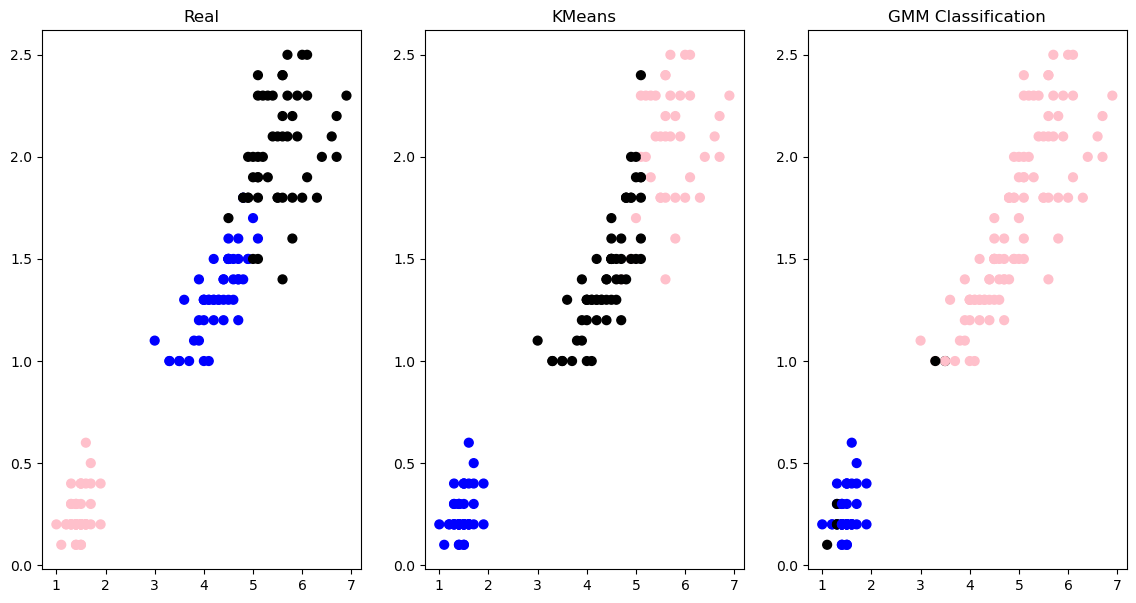

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris

# Load dataset
dataset = load_iris()

# Create DataFrame
X = pd.DataFrame(dataset.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y = pd.DataFrame(dataset.target, columns=['Targets'])

# Set colors for visualization
colormap = np.array(['pink', 'blue', 'black'])

plt.figure(figsize=(14, 7))

# REAL PLOT
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real')

# K-Means Clustering
model = KMeans(n_clusters=3, random_state=42)  # Set random_state for reproducibility
model.fit(X)
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)

plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[predY], s=40)
plt.title('KMeans')

# Gaussian Mixture Model (GMM)
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
y_cluster_gmm = gmm.predict(X_scaled)

plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')

plt.show()
